# Cultural Differences in countries based on The Hofstede model 

The six dimensions of national culture are based on extensive research done by Professor Geert Hofstede, Gert Jan Hofstede, Michael Minkov and their research teams. The cultural dimensions represent independent preferences for one state of affairs over another that distinguish countries (rather than individuals) from each other.

More details about what these values represent:
https://en.wikipedia.org/wiki/Hofstede%27s_cultural_dimensions_theory

Source of the data:
https://geerthofstede.com/research-and-vsm/dimension-data-matrix/

In [138]:
import pandas as pd
from sklearn.manifold import TSNE
import plotly.express as px
import pycountry_convert as pc

In [139]:
df = pd.read_csv('national_culture.csv', sep=';')
df

ctr      country     pdi     idv     mas     uai  ltowvs  ivr
0    AFE  Africa East      64      27      41      52      32   40
1    AFW  Africa West      77      20      46      54       9   78
2    ALB      Albania  #NULL!  #NULL!  #NULL!  #NULL!      61   15
3    ALG      Algeria  #NULL!  #NULL!  #NULL!  #NULL!      26   32
4    AND      Andorra  #NULL!  #NULL!  #NULL!  #NULL!  #NULL!   65
..   ...          ...     ...     ...     ...     ...     ...  ...
106  URU      Uruguay      61      36      38     100      26   53
107  VEN    Venezuela      81      12      73      76      16  100
108  VIE      Vietnam      70      20      40      30      57   35
109  ZAM       Zambia  #NULL!  #NULL!  #NULL!  #NULL!      30   42
110  ZIM     Zimbabwe  #NULL!  #NULL!  #NULL!  #NULL!      15   28

[111 rows x 8 columns]

#### Since the data contains a lot of NULL values we need to get rid of them

In [140]:
def convert(n):
    if n=='#NULL!':
        return None
    return int(n)

In [141]:
df['pdi'] = df['pdi'].apply(convert)
df['idv'] = df['idv'].apply(convert)
df['mas'] = df['mas'].apply(convert)
df['uai'] = df['uai'].apply(convert)
df['ltowvs'] = df['ltowvs'].apply(convert)
df['ivr'] = df['ivr'].apply(convert)
df = df.dropna()

#### After we are done with the null values, we add the Continent for the color. To do that we'll use the pycountry package. Since our data groups together some countries, that the package will not recognize, we need to add some if statements.

In [142]:
def country_to_continent(country_name):
    if country_name == 'Africa East' or country_name == 'Africa West':
        return 'Africa'
    if country_name == 'Arab countries':
        return 'Asia'
    
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name
df = df.replace(['Korea South'], 'South Korea')
df = df.replace(['Czech Rep'], 'Czech Republic')
df = df.replace(['Slovak Rep'], 'Slovak Republic')
df = df.replace(['U.S.A.'], 'USA')
df['Continent'] = df['country'].apply(country_to_continent)

In [143]:
df.describe()

pdi        idv        mas         uai      ltowvs         ivr
count   65.000000  65.000000   65.00000   65.000000   65.000000   65.000000
mean    59.307692  44.953846   49.00000   66.538462   48.446154   47.646154
std     20.450339  23.466353   19.83841   22.718438   23.206297   22.251005
min     11.000000  12.000000    5.00000    8.000000    9.000000    0.000000
25%     42.000000  25.000000   40.00000   51.000000   28.000000   29.000000
50%     63.000000  39.000000   49.00000   68.000000   48.000000   46.000000
75%     71.000000  67.000000   61.00000   86.000000   64.000000   66.000000
max    104.000000  91.000000  110.00000  112.000000  100.000000  100.000000

#### Let's initialize the T-distributed Stochastic Neighbor Embedding

In [144]:
model = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=2)

In [145]:
x = df[['pdi', 'idv', 'mas', 'uai', 'ltowvs', 'ivr']].to_numpy()
y = df['country'].to_list()
df_dict = df.to_dict()

In [146]:
x_embedded = model.fit_transform(x)

#### Now that we have the coordinates, we just have to add the culture indexes to the plot

In [147]:
df_to_plot = pd.DataFrame(x_embedded, columns=['x','y'])
df_to_plot['Country'] = df_dict['country'].values()
df_to_plot['Continent'] = df_dict['Continent'].values()
df_to_plot['Power distance'] = df_dict['pdi'].values()
df_to_plot['Individualism'] = df_dict['idv'].values()
df_to_plot['Uncertainty avoidance'] = df_dict['uai'].values()
df_to_plot['Masculinity'] = df_dict['mas'].values()
df_to_plot['Long-term orientation'] = df_dict['ltowvs'].values()
df_to_plot['Indulgence'] = df_dict['ivr'].values()


In [148]:
fig = px.scatter(df_to_plot, x='x', y='y',hover_name='Country', hover_data={'Power distance':True, 'Individualism':True,
                                                       'Uncertainty avoidance':True, 'Masculinity':True, 'Long-term orientation':True,
                                                       'Indulgence':True, 'Continent':False, 'x':False, 'y':False}, color='Continent')
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="open-sans"
    )
)
fig.update_traces(marker=dict(size=12))
fig.write_html("cultural_differences.html")

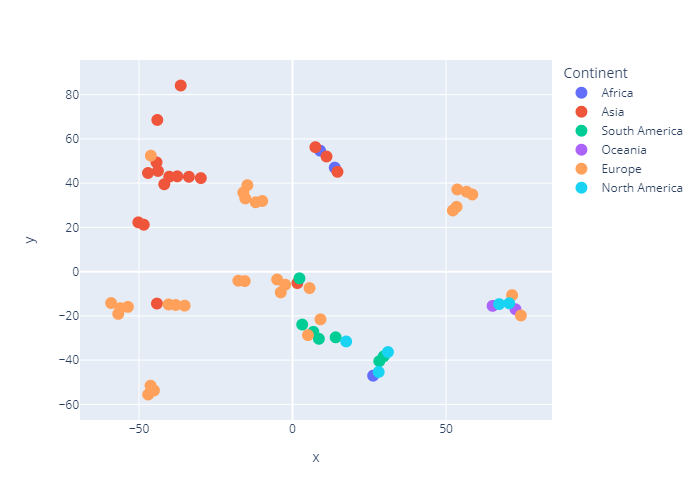

In [149]:
fig.show('png')

#### You can play with the interactive graph at
#### https://peter-akos.github.io/Visualizations/Cultural_Differences/cultural_differences.html


In [150]:
fig.show()